In [6]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from pathlib import Path, PureWindowsPath
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_colwidth', None) #afficher texte entier dans dataframe

In [46]:
current_folder

'c:/Users/eupho/OneDrive/Documents/perso/projets/classification_texte_bapteme_philo/sources/count_matrix'

In [7]:
current_folder = PureWindowsPath(globals()['_dh'][0]).as_posix()
path_root = "/".join(current_folder.split("/")[:-2]) #remonter au dossier root du projet
os.chdir(path_root)
path = PureWindowsPath(os.getcwd() + "/data/input/data.parquet")
path = path.as_posix() #convertir en path linux (convertir les \\ en /)
corpus = pd.read_parquet(path) #engine="fastparquet"

zeros_subset = corpus.loc[corpus["category_bin"] == 0, :]
ones_subset = corpus.loc[corpus["category_bin"] == 1, :]
number_of_minority_class = len(zeros_subset)
sampled_ones = ones_subset.sample(number_of_minority_class, random_state=42)
print(sampled_ones.shape)
corpus = pd.concat([sampled_ones, zeros_subset], ignore_index=True)
corpus = corpus.sample(frac=1).reset_index(drop=True)
corpus.index = list(range(len(corpus)))
corpus["id"] = corpus.index	#creation de l'id seulement apres equilibrage des classes et melange aleatoire
print(corpus["category_bin"].value_counts())
print(corpus.id.duplicated().any())
print(corpus.index.duplicated().any())
corpus

(1825, 6)
1    1825
0    1825
Name: category_bin, dtype: int64
False
False


,id,message,message_preprocessed,category,length,category_bin
0,0,"> Avoir des choses une connaissance propre, **c’est les connaître non > seulement en général, mais selon qu’elles se distinguent les unes des > autres.** Or, c’est ainsi que Dieu connaît les choses, selon ces paroles de > l’épître aux Hébreux (4,12) : “ Elle va (la parole de Dieu) jusqu’à > distinguer l’âme et l’esprit, les jointures et les mœlles ; elle démêle les > sentiments et les pensées du cœur. Aussi nulle créature n’est cachée devant > Dieu. ” – Ia Q14, a6",avoir chose connaissance propre cest connaître non seulement général selon elles distinguent une autres or ainsi dieu connaît chose selon parole épître hébreux “ va parole dieu distinguer âme esprit jointure mœlles démêle sentiment pensée cœur aussi nulle créature cachée devant dieu ” – ia q a,philosophy,474,1
1,1,Comme dit à l’article précédent : « Christ en tant qu’homme » désigne la nature humaine de Dieu. Or la nature humaine ne peut pas être divine. Donc c’est faux.,comme dit article précédent « christ tant homme » désigne nature humaine dieu or nature humaine peut être divine donc faux,philosophy,161,1
2,2,"Quatrièmement, il faut distinguer la régularité et la validité d’un baptême. Même si nous admettons que l’immersion est le mode régulier du baptême (ce que je ne crois pas), il faut distinguer un baptême irrégulier et un baptême invalide. Je vais ici donner un exemple. Lorsque le fils de Moïse a été circoncis en Exode 4, il l’a été par une femme, non pas le 8èmejour, non pas par un membre d’Israël. Cette circoncision était totalement irrégulière si l’on considère les prescriptions de Dieu en Genèse 17. Néanmoins, Dieu est satisfait et [ne menace plus Moïse](https://parlafoi.fr/2018/02/21/pourquoi- dieu-a-t-il-tente-de-tuer-moise/). J’en déduis que nous ne devons pas être plus dur que Dieu ici. Surtout quand celui-ci ne nous a pas dit combien de litres devaient être utilisés pour un baptême ! Tant que de l’eau est appliquée sur le corps au nom du Père, du Fils et du Saint-Esprit, il s’agit d’un baptême.",quatrièmement faut distinguer régularité validité baptême si admettons immersion mode régulier baptême crois faut distinguer baptême irrégulier baptême invalide vais ici donner exemple lorsque fil moïse a circoncis exode a femme non èmejour non membre israël cette circoncision totalement irrégulier si considère prescription dieu genèse néanmoins dieu satisfait menace plus moïsehttpsparlafoifrpourquoi- dieu-a-t-il-tente-de-tuer-moise déduis devon être plus dur dieu ici surtout quand celui-ci a dit combien litre devaient être utilisés baptême tant eau appliquée corps nom père fil saint-esprit agit baptême,baptism,927,0
3,3,"**N’y a-t-il chez le Christ qu’une seule opération, à la fois divine et humaine ? Non.**",ny a-t-il chez christ seule opération foi divine humaine non,philosophy,89,1
4,4,"9. D’AQUIN, Thomas, _Selected Writings_ , Londres : Penguin, 1998, p. 44. En francais [ici](http://docteurangelique.free.fr/bibliotheque/opuscules/30etreetessence.htm).[↩]",aquin thomas selected writings londres penguin p francais icihttpdocteurangeliquefreefrbibliothequeopusculesetreetessencehtm↩,philosophy,173,1
...,...,...,...,...,...,...
3645,3645,"De même, le baptême agit d’une façon similaire et, en quelque sorte, indescriptible et mystérieuse. Ici, les mots me manquent pour décrire la façon dont l’Esprit produit l’assurance lorsque nous considérons notre baptême. Dans le baptême, Dieu me dit « aussi surement que l’eau passe sur ton corps, aussi surement ton impureté spirituelle est lavée par le sang et l’Esprit du Christ, par la foi »[1].",baptême agit façon similaire quelque sorte indescriptible mystérieuse ici mot manquent décrire façon dont esprit produit assurance lorsque considérons baptême baptême dieu dit « aussi surement eau passe corps aussi surement impureté spirituel lavée sang esprit christ foi »,baptism,405,0
3646,3646,"## [Apprendre à raisonner (31) : La différence entre jugement, prop

In [23]:
X = corpus["message_preprocessed"]
y = corpus["category"]
# y = corpus["category_bin"]
indices = corpus["id"]
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, indices, test_size=0.33, random_state=42)
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)
# indices_test
print(X_train_counts)

  (0, 1371)	1
  (0, 3800)	1
  (0, 5629)	1
  (0, 3892)	1
  (0, 5290)	1
  (1, 7801)	3
  (1, 1394)	2
  (1, 8502)	2
  (1, 598)	1
  (1, 3519)	1
  (1, 2189)	2
  (1, 2172)	1
  (1, 838)	1
  (1, 8592)	1
  (1, 1389)	1
  (1, 6173)	1
  (1, 9446)	1
  (1, 1042)	1
  (1, 2700)	1
  (1, 9408)	1
  (1, 5764)	1
  (2, 299)	1
  (2, 7703)	2
  (2, 3119)	2
  (2, 8454)	1
  :	:
  (2443, 3479)	2
  (2443, 7415)	2
  (2443, 7957)	2
  (2443, 2157)	2
  (2443, 4984)	2
  (2443, 3316)	2
  (2443, 5259)	2
  (2443, 5623)	4
  (2443, 8472)	6
  (2443, 7858)	2
  (2443, 426)	4
  (2443, 6799)	2
  (2443, 1835)	1
  (2443, 3071)	2
  (2443, 4667)	1
  (2443, 7767)	1
  (2443, 7625)	1
  (2443, 7022)	2
  (2443, 757)	2
  (2443, 7174)	1
  (2444, 5629)	1
  (2444, 3892)	1
  (2444, 5290)	1
  (2444, 5201)	1
  (2444, 3716)	1


In [9]:
#Dimensions de la matrice
print("corpus.shape =", corpus.shape)
print("X_tfidf.shape =", X_train_counts.shape) # = (nb_documents, nb_mots)
print("X_tfidf.type =", type(X_train_counts)) # = (nb_documents, nb_mots)
print("X_tfidf :")
print(type(X_train_counts))
print(X_train_counts)

corpus.shape = (3650, 6)
X_tfidf.shape = (2445, 9465)
X_tfidf.type = <class 'scipy.sparse.csr.csr_matrix'>
X_tfidf :
<class 'scipy.sparse.csr.csr_matrix'>
  (0, 1371)	1
  (0, 3800)	1
  (0, 5629)	1
  (0, 3892)	1
  (0, 5290)	1
  (1, 7801)	3
  (1, 1394)	2
  (1, 8502)	2
  (1, 598)	1
  (1, 3519)	1
  (1, 2189)	2
  (1, 2172)	1
  (1, 838)	1
  (1, 8592)	1
  (1, 1389)	1
  (1, 6173)	1
  (1, 9446)	1
  (1, 1042)	1
  (1, 2700)	1
  (1, 9408)	1
  (1, 5764)	1
  (2, 299)	1
  (2, 7703)	2
  (2, 3119)	2
  (2, 8454)	1
  :	:
  (2443, 3479)	2
  (2443, 7415)	2
  (2443, 7957)	2
  (2443, 2157)	2
  (2443, 4984)	2
  (2443, 3316)	2
  (2443, 5259)	2
  (2443, 5623)	4
  (2443, 8472)	6
  (2443, 7858)	2
  (2443, 426)	4
  (2443, 6799)	2
  (2443, 1835)	1
  (2443, 3071)	2
  (2443, 4667)	1
  (2443, 7767)	1
  (2443, 7625)	1
  (2443, 7022)	2
  (2443, 757)	2
  (2443, 7174)	1
  (2444, 5629)	1
  (2444, 3892)	1
  (2444, 5290)	1
  (2444, 5201)	1
  (2444, 3716)	1


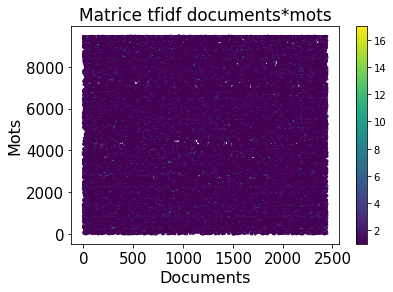

In [10]:
#Plot 1 de la matrice (avec un scatterplot de matplotlib)
path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_matrix_matplotlib.png")
path = path.as_posix()

X_tfidf_dict = X_train_counts.todok()
X_tfidf_xy = np.array(list(X_tfidf_dict.keys()))
X_tfidf_val = np.array(list(X_tfidf_dict.values()))
plt.scatter(X_tfidf_xy[:,0], X_tfidf_xy[:,1], s=5, c=X_tfidf_val)
plt.xlabel("Documents", size=16)
plt.ylabel("Mots", size=16)
plt.title("Matrice count documents*mots", size=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.colorbar()
plt.rcParams["figure.figsize"] = (12, 8)
plt.savefig(path)
plt.show()

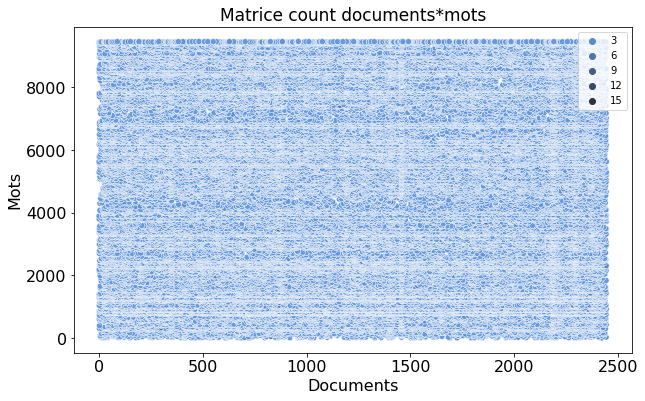

In [16]:
#Plot 2 de la matrice (avec scatterplot de seaborn)
X_tfidf_dict = X_train_counts.todok()
# X_tfidf_dict = X_tfidf[:10000,:].todok()
X_tfidf_xy = np.array(list(X_tfidf_dict.keys()))
X_tfidf_val = np.array(list(X_tfidf_dict.values()))

path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_matrix_seaborn.png")
path = path.as_posix()

sb.scatterplot(x=X_tfidf_xy[:,0], y=X_tfidf_xy[:,1], hue=X_tfidf_val, palette=sb.dark_palette("#69d", reverse=True, as_cmap=True))
plt.xlabel("Documents", size=16)
plt.ylabel("Mots", size=16)
plt.title("Matrice count documents*mots", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (12, 8)
plt.savefig(path)
plt.show()

In [17]:
# Informations sur la matrice #
# Nombre de valeurs non nulles
print("nombre de valeurs non nulles (taille de la matrice csr) =", X_train_counts.count_nonzero())

# Intervalle des valeurs 
print("intervalle des valeurs [{} ; {}]".format(X_train_counts.min(), X_train_counts.max()))

# Valeurs uniques avec unique()
X_tfidf_unique = np.unique(X_train_counts.data)
print("valeurs uniques =", X_tfidf_unique)

# Nombre de valeurs uniques (auquel on additionne 1 pour les 0 qui ne sont pas stockees par definition)
print("nombre de valeurs uniques =", X_tfidf_unique.shape[0] + 1)

nombre de valeurs non nulles (taille de la matrice csr) = 60577
intervalle des valeurs [0 ; 17]
valeurs uniques = [ 1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17]
nombre de valeurs uniques = 17


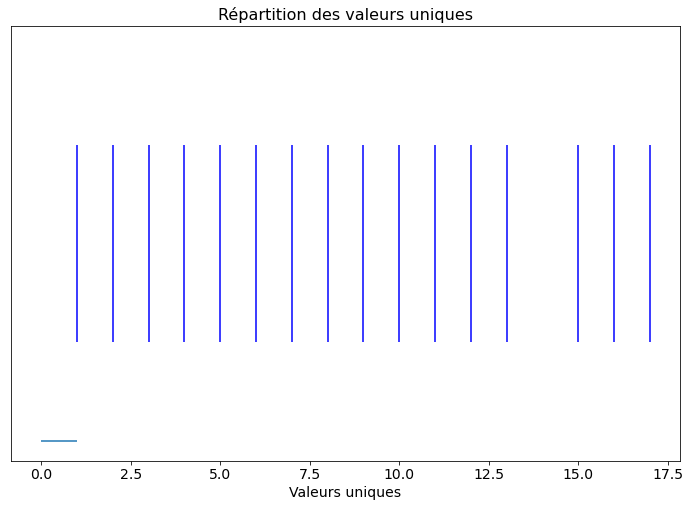

In [18]:
# Graphique avec barres en 1D des valeurs uniques (pour voir comment elles sont reparties, que a droite ?, que a gauche ?, etc.)
# sb.scatterplot(x=X_tfidf_unique, y=np.zeros_like(X_tfidf_unique), sizes=(10000,10000))
path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_unique_distribution.png")
path = path.as_posix()

plt.figure()
plt.hlines(0,0,1)  # Draw a horizontal line
plt.eventplot(X_tfidf_unique, orientation='horizontal', colors='b')
plt.xlabel("Valeurs uniques", size=14)
plt.title("Répartition des valeurs uniques", size=16)
plt.xticks(fontsize=14)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.rcParams["figure.figsize"] = (9, 4)
plt.savefig(path)
plt.show()

In [20]:
X_train_counts.data

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

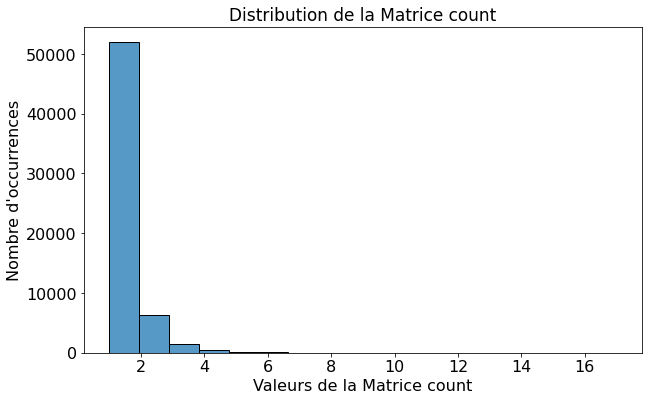

In [21]:
# Distribution des valeurs de la matrice count
# values, counts = np.unique(X_tfidf.data, return_counts=True)
# value_counts = np.asarray((values, counts)).T

path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_distribution.png")
path = path.as_posix()

sb.histplot(X_train_counts.data)
plt.xlabel("Valeurs de la Matrice count", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution de la Matrice count", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.savefig(path)
plt.show()


In [26]:
# Poids globaux (dans le corpus) des mots tfidf
# print("X_train_counts.shape =", X_train_counts.shape)
# n_words = X_train_counts.shape[1]
# scores_tfidf = pd.DataFrame({"id":range(n_words), "words":count_vectorizer.get_feature_names(), "idf":count_vectorizer.idf_})
# scores_tfidf = scores_tfidf.sort_values("idf", ascending=False)
# print("moyenne des poids idf =", np.mean(scores_tfidf["idf"]))
# print("ecart-type des poids idf =", np.std(scores_tfidf["idf"]))
# with pd.option_context("display.max_rows", 100):
#     display(scores_tfidf)
# scores_tfidf.to_csv("./data/output/scores_tfidf_train.csv")

X_train_counts.shape = (2445, 9465)


c:\Users\eupho\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


AttributeError: 'CountVectorizer' object has no attribute 'idf_'

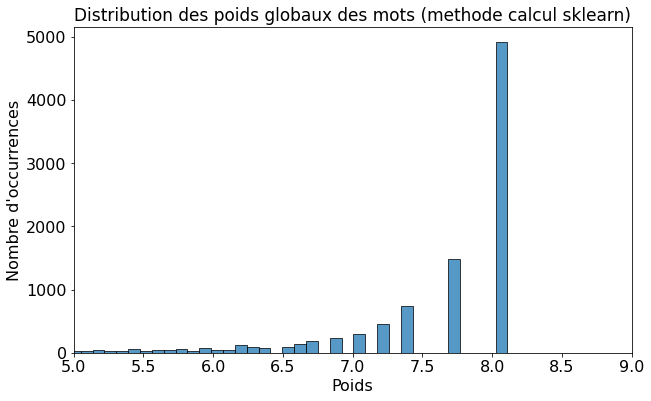

In [ ]:
# Distribution des poids globaux des mots (calcules avec sklearn)
path = PureWindowsPath(os.getcwd() + "\\data\\output\\words_weights_distribution.png")
path = path.as_posix()

sb.histplot(data=scores_tfidf, x="idf")
# plt.yscale('log')
plt.xlabel("Poids", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution des poids globaux des mots (methode calcul sklearn)", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
plt.xlim(5, 9)
plt.savefig(path)
plt.show()

In [27]:
# Calcul manuel des poids
print("X_train_counts.shape =", X_train_counts.shape)
words_weights = X_train_counts.sum(axis=0)
print("words_weights.shape =", words_weights.shape)
print(words_weights)
print(words_weights.shape)
words_weights = np.ravel(words_weights)
print(words_weights)
print(words_weights.shape)
# words_weights[:10]
np.set_printoptions(suppress=True)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
np.unique(words_weights).shape
np.max(words_weights)
np.min(words_weights)
print("words_weights.shape =", words_weights.shape)
words_weights

X_train_counts.shape = (2445, 9465)
words_weights.shape = (1, 9465)
[[1 1 1 ... 2 1 1]]
(1, 9465)
[1 1 1 ... 2 1 1]
(9465,)
words_weights.shape = (9465,)


array([1, 1, 1, ..., 2, 1, 1], dtype=int64)

In [34]:
values, counts = np.unique(words_weights, return_counts=True) #retourne des numpy.ndarray 
np.asarray((values, counts)).T
max(words_weights)
min(words_weights)

1

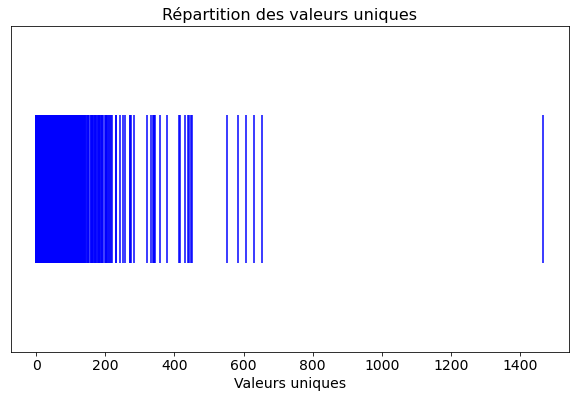

In [35]:
# Distribution des poids globaux des mots (calcules avec a la main)
# Pour chaque phrase, y a-t-il beaucoup de mots qui ont ete trouves et qui ont influences positivement la prediction ?

# Graphique avec barres en 1D des valeurs uniques (pour voir comment elles sont reparties, que a droite ?, que a gauche ?, etc.)
# sb.scatterplot(x=X_tfidf_unique, y=np.zeros_like(X_tfidf_unique), sizes=(10000,10000))
path = PureWindowsPath(os.getcwd() + "\\data\\output\\tfidf_unique_distribution.png")
path = path.as_posix()

plt.figure()
plt.hlines(0,0,1)  # Draw a horizontal line
plt.eventplot(words_weights, orientation='horizontal', colors='b')
plt.xlabel("Valeurs uniques", size=14)
plt.title("Répartition des valeurs uniques", size=16)
plt.xticks(fontsize=14)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.rcParams["figure.figsize"] = (9, 4)
plt.savefig(path)
plt.show()

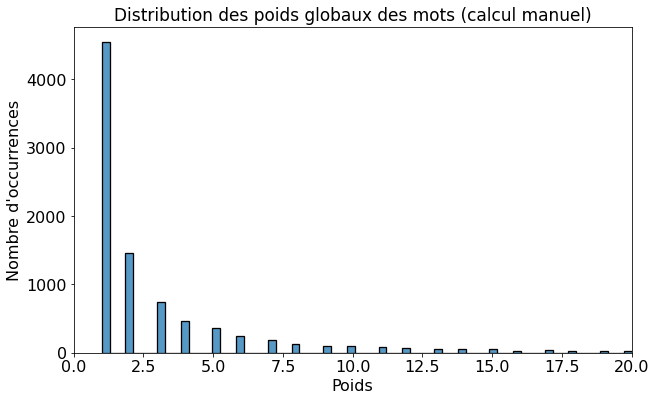

In [45]:
path = PureWindowsPath(os.getcwd() + "\\data\\output\\words_weights_distribution_manuel.png")
path = path.as_posix()

# sb.histplot(words_weights[:100000])
sb.histplot(words_weights, edgecolor="black", linewidth=1.3)
# plt.yscale('log')
plt.xlabel("Poids", size=16)
plt.ylabel("Nombre d'occurrences", size=16)
plt.title("Distribution des poids globaux des mots (calcul manuel)", size=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rcParams["figure.figsize"] = (10, 6)
# plt.xlim(0, 200)
plt.xlim(0, 20)
plt.savefig(path)
plt.show()

In [44]:
fig = px.histogram(words_weights)
fig.update_traces(marker_line_width=1,marker_line_color="white")
fig.show()